# ***AI Personal Trainer- Biceps curls***



In [ ]:
!pip install mediapipe 

     |████████████████████████████████| 32.4 MB 68 kB/s 


# **1. Pose Module:** 
This module is responsible for all the pose estimation which we need for our AI Trainer. We are importing Pose Module to our AI trainer to perform AI trainer real time application. 

Steps for implementation are as follows:
 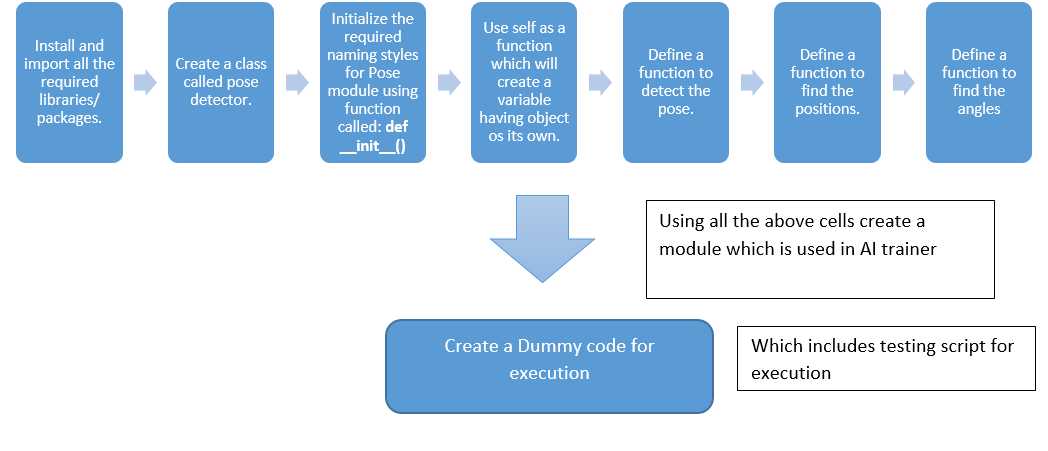









**Testing Script includes:**
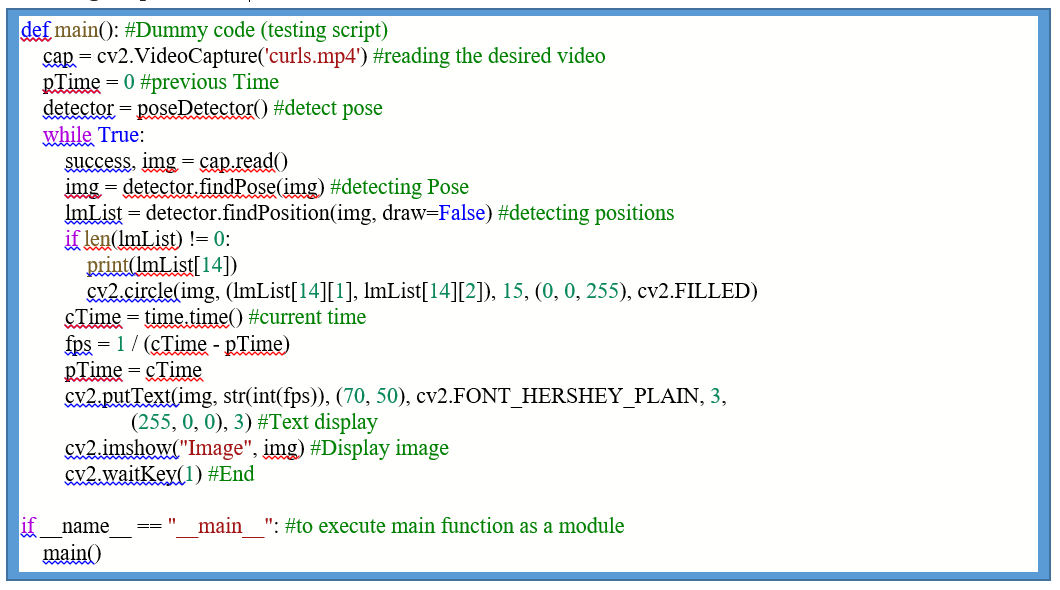

**Naming styles are as follows:**

**STATIC_IMAGE_MODE**:
If set to false, the solution treats the input images as a video stream. It will try to detect the most prominent person in the very first images, and upon a successful detection further localizes the pose landmarks. In subsequent images, it then simply tracks those landmarks without invoking another detection until it loses track, on reducing computation and latency. If set to true, person detection runs every input image, ideal for processing a batch of static, possibly unrelated, images. Default to false.

**MODEL_COMPLEXITY**:
Complexity of the pose landmark model: 0, 1 or 2. Landmark accuracy as well as inference latency generally go up with the model complexity. Default to 1.

**SMOOTH_LANDMARKS**:
If set to true, the solution filters pose landmarks across different input images to reduce jitter, but ignored if static_image_mode is also set to true. Default to true.

**ENABLE_SEGMENTATION**:
If set to true, in addition to the pose landmarks the solution also generates the segmentation mask. Default to false.

**SMOOTH_SEGMENTATION**:
If set to true, the solution filters segmentation masks across different input images to reduce jitter. Ignored if enable_segmentation is false or static_image_mode is true. Default to true.

**MIN_DETECTION_CONFIDENCE**:
Minimum confidence value ([0.0, 1.0]) from the person-detection model for the detection to be considered successful. Default to 0.5.

**MIN_TRACKING_CONFIDENCE:**
Minimum confidence value ([0.0, 1.0]) from the landmark-tracking model for the pose landmarks to be considered tracked successfully, or otherwise person detection will be invoked automatically on the next input image. Setting it to a higher value can increase robustness of the solution, at the expense of a higher latency. Ignored if static_image_mode is true, where person detection simply runs on every image. Default to 0.5.

In [ ]:
#For pose module the code is: 
import cv2 #for opencv
import mediapipe as mp #to get pose estimation
import time #Time
import math #mathematical function

class poseDetector():#create objects and methods for pose detection
#self is when we want variables to have its own object.
    def __init__(self, static_image_mode=False, model_complexity=False, smooth_landmarks=True,
                min_detection_confidence=0.5, min_tracking_confidence=0.5): #Initalization   

        self.static_image_mode = static_image_mode
        self.model_complexity = model_complexity
        self.smooth_landmarks = smooth_landmarks
        self.min_detection_confidence = min_detection_confidence
        self.min_tracking_confidence = min_tracking_confidence
        self.mpDraw = mp.solutions.drawing_utils #for drawing utils 
        self.mpPose = mp.solutions.pose #Pose

        self.pose = self.mpPose.Pose(static_image_mode=self.static_image_mode, model_complexity=self.model_complexity,
                                     smooth_landmarks=self.smooth_landmarks,
                                     min_detection_confidence=self.min_detection_confidence,
                                     min_tracking_confidence=self.min_tracking_confidence) 
        
    #For finding pose
    def findPose(self, img, draw=True): #Draw= True to draw on the image
        imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converting the BGR color to RGB
        self.results = self.pose.process(imgRGB) #detection of pose in RGB 
        if self.results.pose_landmarks: #Results 
            if draw: #Draw landmarks
                self.mpDraw.draw_landmarks(img, self.results.pose_landmarks,self.mpPose.POSE_CONNECTIONS) #Drawing points with connections ie. lines of landmarks.
        return img #return image
   
    #For finding positions
    def findPosition(self, img, draw=True):
        self.lmList = [] #landmarks list 
        if self.results.pose_landmarks:
            for id, lm in enumerate(self.results.pose_landmarks.landmark): #to get the loop count use enumerate 
                h, w, c = img.shape #image shape of h=height, w=width, c=channel 
                # print(id, lm)
                cx, cy = int(lm.x * w), int(lm.y * h) #lm.x * w will give x of our landmark similarly lm.y * h will give y of our landmark
                self.lmList.append([id, cx, cy]) #
                if draw:
                    cv2.circle(img, (cx, cy), 5, (255, 0, 0), cv2.FILLED) #Draw circle (255, 0, 0) is blue color 
        return self.lmList #returns lmlist

    def findAngle(self, img, p1, p2, p3, draw=True):
        # Get the landmarks
        x1, y1 = self.lmList[p1][1:] #getting the landmarks at the p1 and slicing it from point 1 till the end
        x2, y2 = self.lmList[p2][1:] #getting the landmarks at the p2 and slicing it from point 1 till the end
        x3, y3 = self.lmList[p3][1:] #getting the landmarks at the p3 and slicing it from point 1 till the end
        # Calculate the Angle
        angle = math.degrees(math.atan2(y3 - y2, x3 - x2) - 
                             math.atan2(y1 - y2, x1 - x2)) #Using math function calculate the angle between this landmarks in degrees. 
        #when the angles are negative in that case use this condition ie. (360- the value) to solve the negative angles.
        if angle < 0:
            angle += 360
        # print(angle) #printing the angle 
        # Draw
        if draw: #for making sure that we are getting the points correctly.
            cv2.line(img, (x1, y1), (x2, y2), (255, 255, 255), 3) #for drawing a line between x1,y1 and x2,y2. 255 is used for white colour and value of 3 is used for thickness.
            cv2.line(img, (x3, y3), (x2, y2), (255, 255, 255), 3)
            cv2.circle(img, (x1, y1), 10, (0, 0, 255), cv2.FILLED) #for drawing a circle, 10 represents the size and 0,0,255 is used for red colour with thickness of 2
            cv2.circle(img, (x1, y1), 15, (0, 0, 255), 2)
            cv2.circle(img, (x2, y2), 10, (0, 0, 255), cv2.FILLED)
            cv2.circle(img, (x2, y2), 15, (0, 0, 255), 2)
            cv2.circle(img, (x3, y3), 10, (0, 0, 255), cv2.FILLED)
            cv2.circle(img, (x3, y3), 15, (0, 0, 255), 2)
            cv2.putText(img, str(int(angle)), (x2 - 50, y2 + 50), #x2 is the middle point for which we don't want angle exactly the the point so we subtract 50 so that we get values near to the center points.
                        cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2) #0,0,255 is used for red color , FONT_HERSHEY_PLAIN is used to provide fonts with thickness of 2
        return angle #returns angles 

def main(): #Dummy code (testing script)
    cap = cv2.VideoCapture('curls.mp4') #reading the desired video 
    pTime = 0 #previous Time
    detector = poseDetector() #detect pose
    while True:
        success, img = cap.read()
        img = detector.findPose(img) #detecting Pose
        lmList = detector.findPosition(img, draw=False) #detecting positions 
        if len(lmList) != 0:
            print(lmList[14])
            cv2.circle(img, (lmList[14][1], lmList[14][2]), 15, (0, 0, 255), cv2.FILLED)
        cTime = time.time() #current time
        fps = 1 / (cTime - pTime) 
        pTime = cTime
        cv2.putText(img, str(int(fps)), (70, 50), cv2.FONT_HERSHEY_PLAIN, 3,
                    (255, 0, 0), 3) #Text display 
        cv2.imshow("Image", img) #Display image
        cv2.waitKey(1) #End 

if __name__ == "__main__": #to execute main function as a module 
    main() 


#2.**AI Trainer**
This module is used for executing for real time application as well as for video and image data. As mentioned earlier for this module we need to import Pose Module in this module as it contains basic requirements for pose estimation.

Steps for implementing AI Trainer:
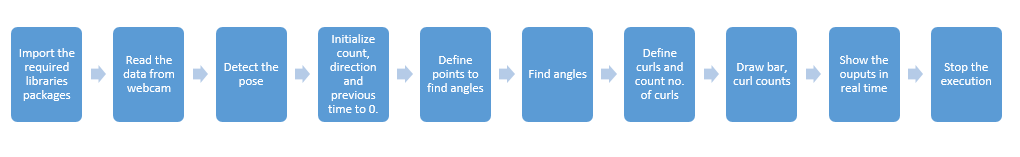

In [ ]:
#For Ai personal Trainer the code is:
#importing all the required libraries 
import cv2
import numpy as np
import time 
import posemodule as pm #Pose Module

cap = cv2.VideoCapture(0) #0 for web cam . Also you can give the path containing the video file for capturing the videp
detector = pm.poseDetector() #it will detect the pose
count = 0 #Initially the count is 0
dir = 0 #Direction 
pTime = 0 #previous time
while True:
    success, img = cap.read()
    img = cv2.resize(img, (1280, 720)) #resize the video for better visuals
    # img = cv2.imread("AiTrainer/test.jpg") #this is used when we are passing image as an ip.
    img = detector.findPose(img, False) #It will detect the pose only once.False when we don't want to draw. The default value is True (i.e.we draw the image) 
    lmList = detector.findPosition(img, False) #this will find the position(i.e. Landmark values). False is used when we don't want to draw. 
    # print(lmList) #Shows the landmarks in the form of points
    if len(lmList) != 0:
        # Right Arm
        angle = detector.findAngle(img, 12, 14, 16) #12,14,16 are the points on the right arm using mediapipe Pose landmarks to find the angle between them 
        # # Left Arm
        #angle = detector.findAngle(img, 11, 13, 15,False) #Same as what we did for right arm.
        per = np.interp(angle, (210, 310), (0, 100)) # Convert (210,310) range into (0,100) in range 
        bar = np.interp(angle, (220, 310), (650, 100)) #Convert (220,310) range into (650,100) in range for bars max value is 650 and min value is 100. 
        # print(angle, per)
        # Check for the dumbbell curls
        color = (255, 0, 255) #Purple 
        if per == 100:
            color = (0, 255, 0) #Green
            if dir == 0: #going up 
                count += 0.5 #Add 0.5 to the count 
                dir = 1 #going down 
        if per == 0: 
            color = (0, 255, 0) #Green
            if dir == 1: #going up
                count += 0.5 #Add 0.5 to the count
                dir = 0 #going down
        print(count) #It will display the counts for dumbell curls (for going up and down) it counts it as 1 when it goes up and comes down .

        # Draw Bar
        cv2.rectangle(img, (1100, 100), (1175, 650), color, 3) 
        cv2.rectangle(img, (1100, int(bar)), (1175, 650), color, cv2.FILLED)
        cv2.putText(img, f'{int(per)} %', (1100, 75), cv2.FONT_HERSHEY_PLAIN, 4,
                    color, 4) #using color so that we will understand when it had reached the max or min position 
        
        # Draw Curl Count
        cv2.rectangle(img, (0, 450), (250, 720), (0, 255, 0), cv2.FILLED) 
        cv2.putText(img, str(int(count)), (45, 670), cv2.FONT_HERSHEY_PLAIN, 15,
                    (255, 0, 0), 25) #for displaying the count on the screen 
    cTime = time.time() #current time
    fps = 1 / (cTime - pTime) # 1- current time/previous time
    pTime = cTime 
    cv2.putText(img, str(int(fps)), (50, 100), cv2.FONT_HERSHEY_PLAIN, 5,
                (255, 0, 0), 5) #Displaying it on the screen
    cv2.imshow("Image", img) #Display
    key = cv2.waitKey(1) 
    if key == ord('q'): #for stopping the implementation 
        break


#**Results:**

**Output in Real time:**

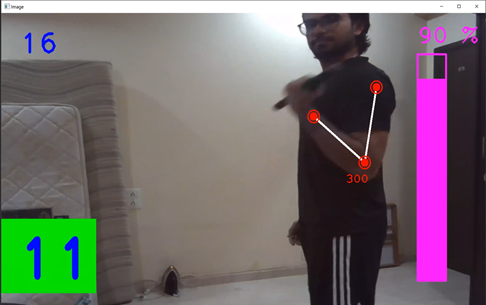

**Output for Video:**
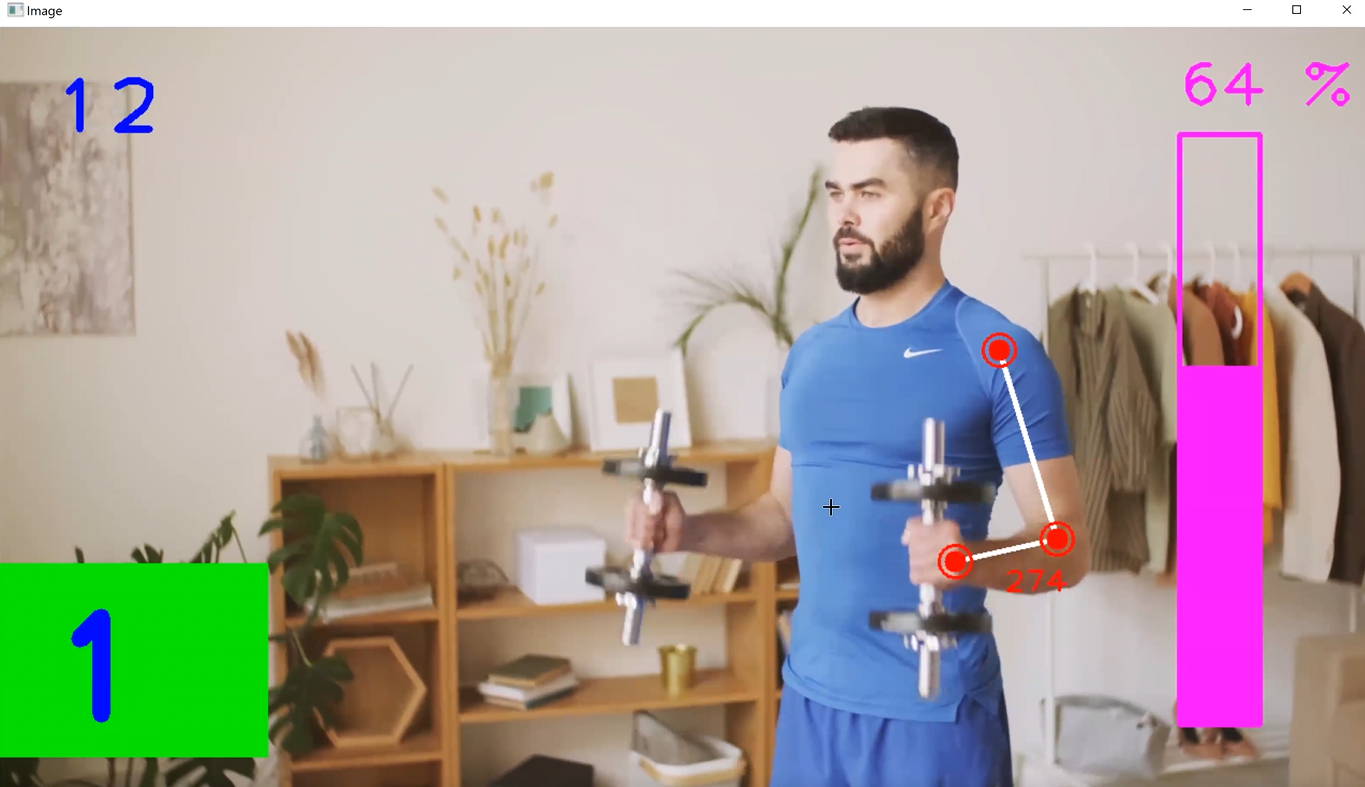